# Melanoma Detection Assignment

##### Problem Statement:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Steps Followed:

1. Import libraries
2. Import image data

**[A] Model building & training on the Original Data**

3. Load input images into train and validation datasets
4. Visualize the data
5. Create the model
6. Compile the model
7. Train the model # 20 epochs
8. Visualize the results
9. Findings

**[B] Model building & training on the Rectified Class Imbalance Data**

10. Rectify class imbalances present in the training dataset
11. Create the model after rescaling images 
12. Compile the model
13. Train the model # 30 epochs
14. Visualize the results
15. Findings after Rectified Class Imbalance Treatment

**[C] Model building & training on the Rectified Class Imbalance Data using Augmentor**

16. Rectify class imbalances present in the training dataset with Augmentor library
17. Load new set of images into train and validation datasets
18. Create the model after rescaling images 
19. Compile the model
20. Train the model # 30 epochs
21. Visualize the results
22. Findings after Rectified Class Imbalance Treatment

### Step 1: Import Libraries

In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image
import matplotlib.image as mpimg

import pathlib
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

%matplotlib inline

import random

# set seed
np.random.seed(42)

### Step 2: Import Image Data

In [2]:
## For data from google drive:

## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [4]:
# Find all files matching a pattern at the path

list_train = list(data_dir_train.glob('*/*.jpg'))
list_test = list(data_dir_test.glob('*/*.jpg'))

image_count_train = len(list_train)
print("Train images: ", image_count_train)
image_count_test = len(list_test)
print("Test  images: ", image_count_test)
print("Total images: ", image_count_train + image_count_test)

Train images:  2239
Test  images:  118
Total images:  2357


In [5]:
# Loading train images from dirs and subdirs (skipping hidden files like .DS_Store)

images = []
path = data_dir_train
for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            img = mpimg.imread(os.path.join(subdir, file))
            if img is not None:
                images.append(img)
        except:
            print('Cant import ' + file + ' from ' + subdir)

img_train = np.asarray(images, dtype=object)

Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Can

In [6]:
print(type(img_train))
img_train.shape

<class 'numpy.ndarray'>


(2239,)

In [7]:
img_train_df = pd.DataFrame(img_train)

In [8]:
print(type(img_train_df))
img_train_df.shape

<class 'pandas.core.frame.DataFrame'>


(2239, 1)

In [9]:
# Loading test images from dirs and subdirs (skipping hidden files like .DS_Store)

images = []
path = data_dir_test
for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            img = mpimg.imread(os.path.join(subdir, file))
            if img is not None:
                images.append(img)
        except:
            print('Cant import ' + file + ' from ' + subdir)

img_test = np.asarray(images, dtype=object)

Cant import .DS_Store from Skin cancer ISIC The International Skin Imaging Collaboration/Test


In [10]:
print(type(img_test))
img_test.shape

<class 'numpy.ndarray'>


(118,)

## [A] Model building & training on the Original Data

### Step 3: Load Input Images into Train Dataset

In [11]:
PATH = ("Skin cancer ISIC The International Skin Imaging Collaboration/")

train_dir = os.path.join(PATH, 'Train')
test_dir = os.path.join(PATH, 'Test')

In [12]:
BATCH_SIZE = 32
IMG_WIDTH  = 180
IMG_HEIGHT = 180

In [13]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]

    for subdir, dirs, files in os.walk(img_folder):
        for file in files:
            try:
                image_path= os.path.join(subdir, file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
                    image = image.astype('float32')
                    image=np.array(image)
                    image /= 255
                    img_data_array.append(image)
                    class_name.append(subdir)
            except:
                print('Cant import ' + file + ' from ' + subdir)
    return img_data_array, class_name

# extract the image array and class name
img_data, class_name = create_dataset(train_dir)

In [14]:
target_dict = {k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis': 0,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma': 1,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma': 2,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma': 3,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus': 4,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis': 5,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis': 6,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma': 7,
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion': 8}

In [15]:
target_val =  [target_dict[class_name[i]] for i in range(len(class_name))]

In [16]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            batch_size=BATCH_SIZE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2022-07-20 13:46:03.551210: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                 validation_split=0.2,
                                                                 subset="validation",
                                                                 seed=123,
                                                                 image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 batch_size=BATCH_SIZE)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [18]:
class_names = train_dataset.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [19]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset).numpy())
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset).numpy())

Number of training batches: 56
Number of validation batches: 14


### Step 4: Visualize the Data

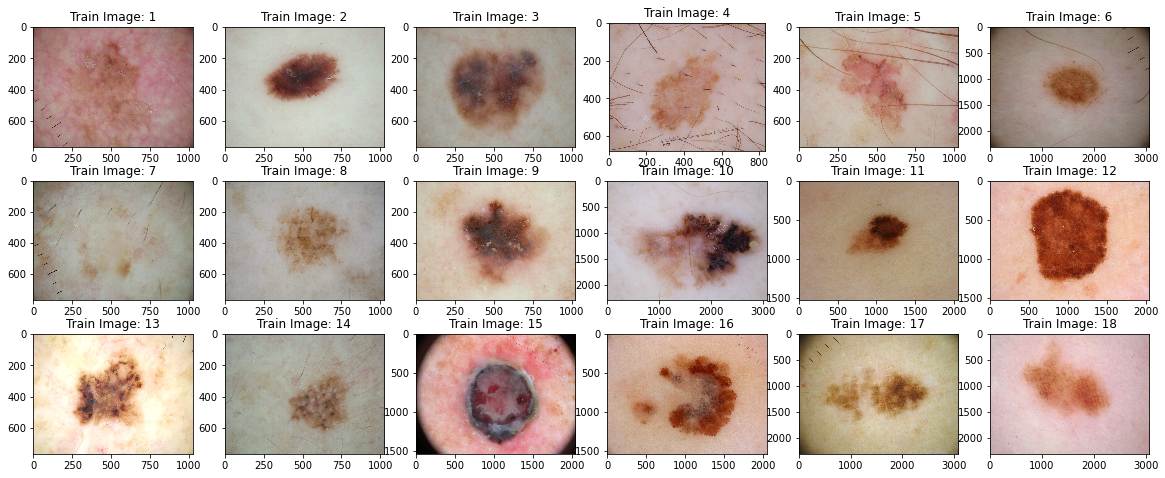

In [20]:
# Displaying first few images of training set

fig = plt.figure(figsize=(20,8))
columns = 6
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text("Train Image: " + str(i))
    plt.imshow(img_train[i], interpolation='nearest')
    
plt.show()

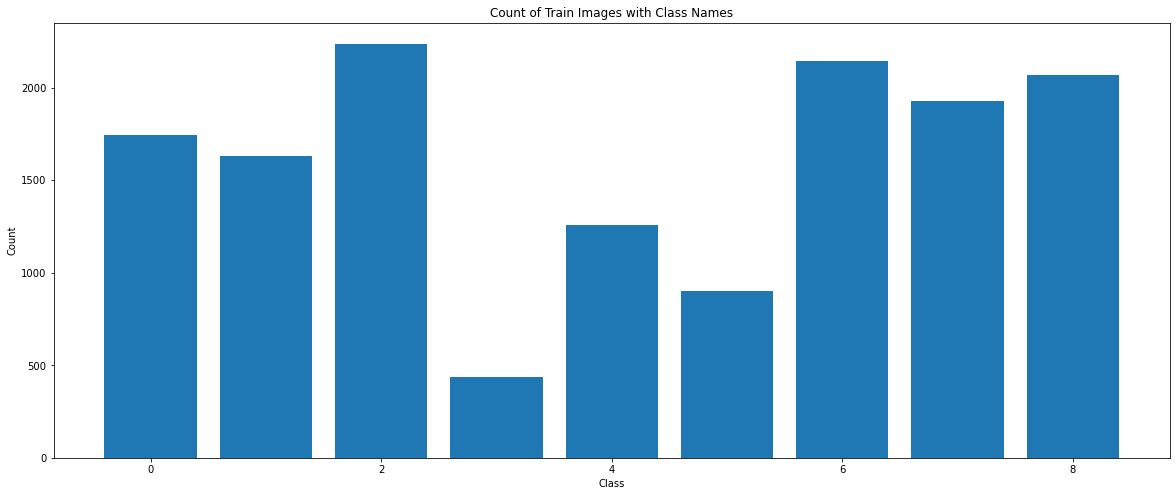

In [21]:
# Plot the bar graph of the count of training images belonging to each class

plt.figure(figsize=(20, 8))
plt.title('Count of Train Images with Class Names')

plt.bar(target_val, np.arange(len(target_val)))

plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

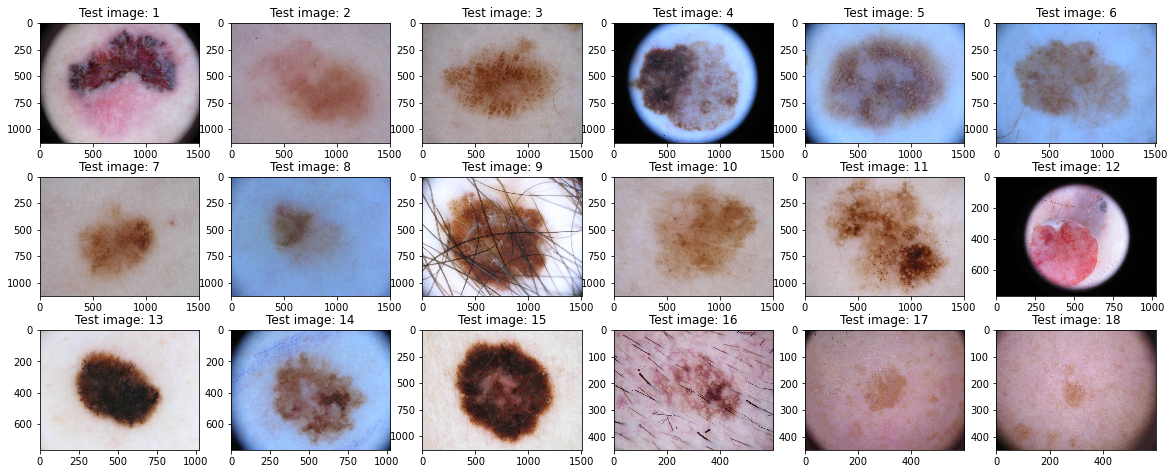

In [22]:
# Displaying first few images of test set

fig = plt.figure(figsize=(20,8))
columns = 6
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text("Test image: " + str(i))
    plt.imshow(img_test[i], interpolation='nearest')
    
plt.show()

In [23]:
# Prefetch the data for better performance
# Dataset.cache(): keeps the images in memory after they're loaded off disk during the first epoch.
# Dataset.prefetch(): overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Step 5: Create the Model

In [24]:
# Model initialize

def build_cnn_model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3), num_classes=9):
    
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        
        layers.Conv2D(16, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
                
        layers.BatchNormalization(),
        
        layers.Flatten(),
        
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        
        layers.Dense(num_classes, activation = 'softmax')
    ])
    
    model.summary()
    
    return model  

In [25]:
# Define Optimizer

optimizer= Adam(learning_rate=0.001) 

/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
# Define Loss function

lossfn = 'sparse_categorical_crossentropy'

In [27]:
## Build CNN model

model = build_cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0

### Step 6: Compile the Model

In [28]:
# Compile the model with an appropirate optimiser and loss function

model.compile(optimizer=optimizer,
              loss=lossfn,
              metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

### Step 7: Train the Model

In [29]:
epochs = 20

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 30s 496ms/step - loss: 2.4010 - accuracy: 0.3968 - categorical_accuracy: 0.0173 - val_loss: 2.3742 - val_accuracy: 0.1499 - val_categorical_accuracy: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 27s 485ms/step - loss: 1.4700 - accuracy: 0.5045 - categorical_accuracy: 0.0385 - val_loss: 3.3874 - val_accuracy: 0.1499 - val_categorical_accuracy: 0.0000e+00
Epoch 3/20
56/56 [==============================] - 23s 410ms/step - loss: 1.2615 - accuracy: 0.5586 - categorical_accuracy: 0.0324 - val_loss: 4.2784 - val_accuracy: 0.1544 - val_categorical_accuracy: 0.0000e+00
Epoch 4/20
56/56 [==============================] - 23s 412ms/step - loss: 1.1857 - accuracy: 0.5815 - categorical_accuracy: 0.0273 - val_loss: 4.1825 - val_accuracy: 0.1544 - val_categorical_accuracy: 0.0000e+00
Epoch 5/20
56/56 [==============================] - 30s 537ms/step - loss: 1.0190 - accuracy: 0.6462 - categorical_accuracy: 0.0368 - val_loss: 3.90

### Step 8: Visualize the results

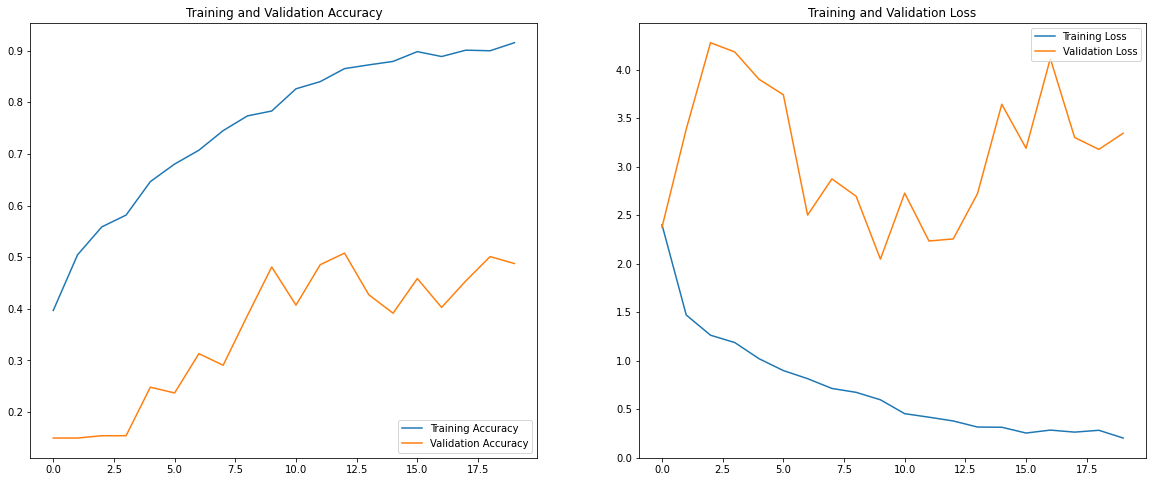

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Step 9: Findings

##### Class Distribution

There is an indication of class imbalance in the training dataset.

The class 3 (Melanoma) has least number of training images.
The classes 2 (dermatofibroma), 6 (seborrheic keratosis), 7 (squamous cell carcinoma) and 8 (vascular lesion) dominate the data in terms of proportionate number of samples.

# The model (plain vanilla) accuracy is 91.52% and the validation accuracy is 48.77%.

This is an evidence of overfit.

In order to handle Class Imbalance, we will be using data augmentation process. 

## [B] Model building & training on the Rectified Class Imbalance Data

### Step 10: Rectify class imbalances present in the traing dataset 

In [33]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomWidth(0.2),
        layers.experimental.preprocessing.RandomHeight(0.2),
        layers.experimental.preprocessing.RandomContrast(0.2)
    ]
)

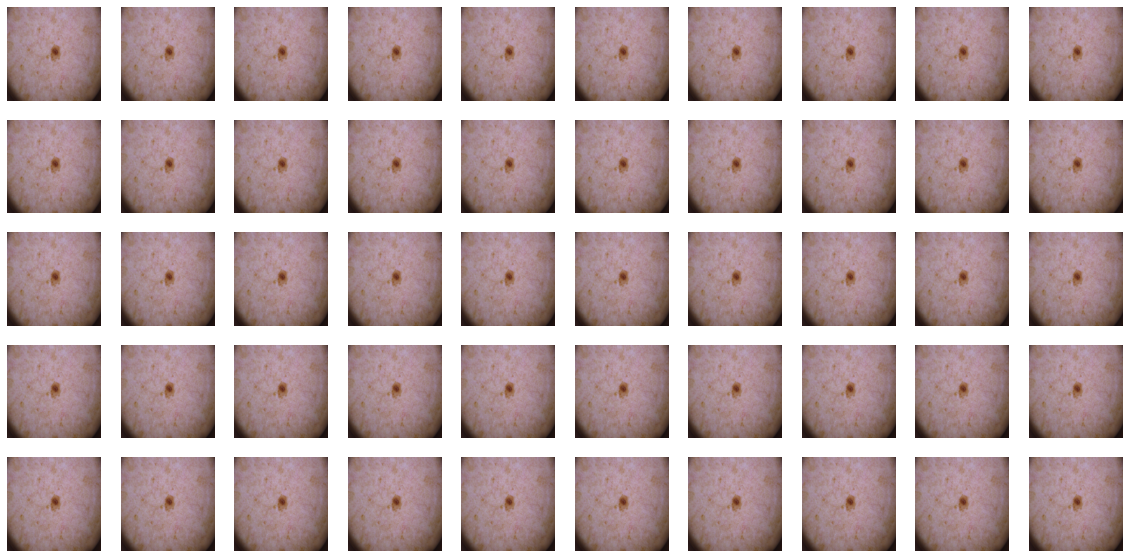

In [34]:
plt.figure(figsize=(20, 10))
for img_data, class_name in train_dataset.take(1):
  for i in range(50):
    augmented_images = data_augmentation(img_data)
    ax = plt.subplot(5, 10, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Step 11: Create the model after rescaling images 

In [35]:
# Model initialize

def build_cnn_model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3), num_classes=9):
    
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        
        data_augmentation,
        
        layers.Conv2D(16, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Dropout(0.2),

        layers.GlobalMaxPool2D(),
        
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        
        layers.Dense(num_classes, activation = 'softmax')
    ])
    
    model.summary()
    
    return model 

In [36]:
# Define Optimizer

optimizer= Adam(learning_rate=0.001) 

In [37]:
# Define Loss function

lossfn = 'sparse_categorical_crossentropy'

In [38]:
## Build CNN model

model = build_cnn_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)       

### Step 12: Compile the model

In [39]:
# Compile the model with an appropirate optimiser and loss function

model.compile(optimizer=optimizer,
              loss=lossfn,
              metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

### Step 13: Train the model

In [40]:
epochs = 30

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 34s 591ms/step - loss: 1.7136 - accuracy: 0.3923 - categorical_accuracy: 0.0017 - val_loss: 2.1883 - val_accuracy: 0.1499 - val_categorical_accuracy: 0.0000e+00
Epoch 2/30
56/56 [==============================] - 31s 556ms/step - loss: 1.4422 - accuracy: 0.4827 - categorical_accuracy: 0.0000e+00 - val_loss: 2.1693 - val_accuracy: 0.1499 - val_categorical_accuracy: 0.0000e+00
Epoch 3/30
56/56 [==============================] - 34s 617ms/step - loss: 1.3458 - accuracy: 0.5352 - categorical_accuracy: 0.0017 - val_loss: 2.1615 - val_accuracy: 0.2192 - val_categorical_accuracy: 0.0000e+00
Epoch 4/30
56/56 [==============================] - 35s 616ms/step - loss: 1.3026 - accuracy: 0.5318 - categorical_accuracy: 0.0011 - val_loss: 2.1443 - val_accuracy: 0.1946 - val_categorical_accuracy: 0.0000e+00
Epoch 5/30
56/56 [==============================] - 34s 598ms/step - loss: 1.2521 - accuracy: 0.5491 - categorical_accuracy: 0.0039 - val_loss: 

### Step 14: Visualize the results

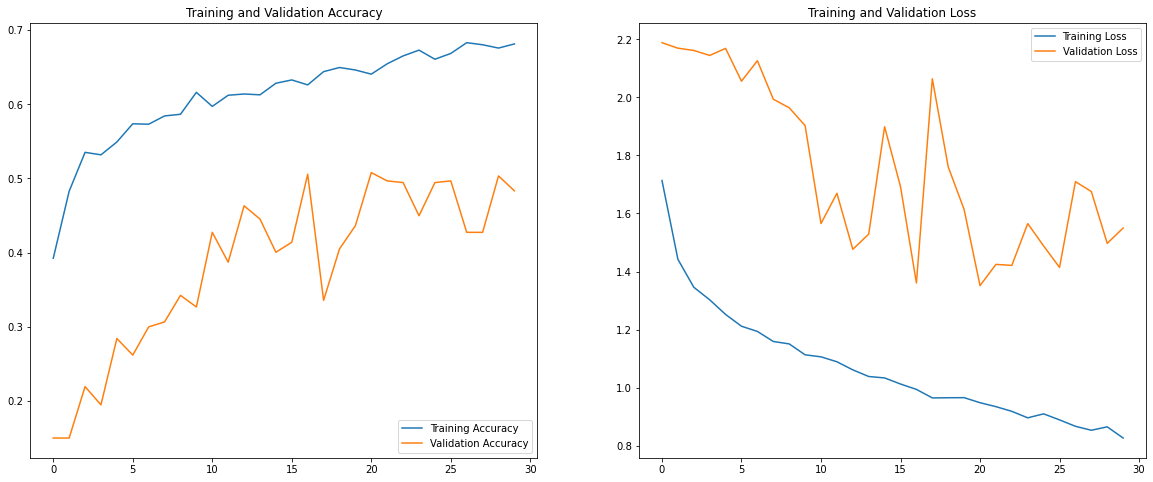

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Step 15: Findings after the Rectified Class Imbalance Treatment

##### No, the issues are not yet resolved.

# The model (with data augmentation) accuracy is 68.14% and the validation accuracy is 48.32%.

There is an evidence of underfit.

Let us try to resolve underfit issue by using the augmentor library to handle class imbalance.

## [C] Model building & training on the Rectified Class Imbalance Data using Augmentor

### Step 16: Rectify class imbalances present in the traing dataset with Augmentor library

In [43]:
path_to_training_dataset=("Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB5F75FDA60>: 100%


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB627AAACA0>: 100%


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB6F097D640>: 100%


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB5F61A6250>: 100


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7FB6F7B5C400>: 10


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB5F6197670>: 100


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB627807160>: 100%


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB62775E190>: 100%


In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [45]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011193.jpg_58aaf487-484c-4541-a967-26a7bca137c5.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011013.jpg_9def8675-1b48-4535-bd7b-70bf2ab36dfa.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010750.jpg_791f8da0-5489-4658-9d62-afae38956196.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010131.jpg_c9c1c581-7cf4-4c16-a58b-8684645b46eb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010938.jpg_d55a87dc-1d6b-4259-8778-e5d51870935d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010653.jpg_b767e98a-5f0f-47d8-8495-ea785acd7c1b.jpg',
 'Skin cancer IS

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [47]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [48]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_img_train_df = img_train_df.append(df2)

In [49]:
new_img_train_df['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

### Step 17: Load new set of images into train and validation datasets

In [50]:
BATCH_SIZE = 32
IMG_WIDTH  = 180
IMG_HEIGHT = 180

In [51]:
# Create the training dataset

data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            seed=123,
                                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                            batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [52]:
# Create the validation dataset

validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                                 validation_split=0.2,
                                                                 subset="validation",
                                                                 seed=123,
                                                                 image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 batch_size=BATCH_SIZE)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Step 18: Create the model after rescaling images 

In [75]:
# Model initialize

def build_cnn_model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3), num_classes=9):
    
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        
        layers.Conv2D(16, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(32, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),
        
        layers.Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'),
        layers.MaxPool2D(pool_size=(2,2)),
        
        layers.BatchNormalization(),

        layers.GlobalMaxPool2D(),
        
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        layers.Dense(128, activation='relu', kernel_initializer='normal'),
        
        layers.Dense(num_classes, activation = 'softmax')
    ])
    
    model.summary()
    
    return model 

In [76]:
# Define Optimizer

optimizer= Adam(learning_rate=0.001) 

In [77]:
# Define Loss function

lossfn = 'sparse_categorical_crossentropy'

In [78]:
## Build CNN model

model = build_cnn_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 90, 90, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)      

### Step 19: Compile the model

In [79]:
# Compile the model with an appropirate optimiser and loss function

model.compile(optimizer=optimizer,
              loss=lossfn,
              metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

### Step 20: Train the model

In [80]:
epochs = 50

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 88s 516ms/step - loss: 1.6165 - accuracy: 0.3713 - categorical_accuracy: 0.0506 - val_loss: 2.2178 - val_accuracy: 0.0913 - val_categorical_accuracy: 0.9725
Epoch 2/50
169/169 [==============================] - 81s 473ms/step - loss: 1.3205 - accuracy: 0.4972 - categorical_accuracy: 0.0881 - val_loss: 1.9820 - val_accuracy: 0.2361 - val_categorical_accuracy: 0.5553
Epoch 3/50
169/169 [==============================] - 82s 478ms/step - loss: 1.1927 - accuracy: 0.5441 - categorical_accuracy: 0.0994 - val_loss: 1.3461 - val_accuracy: 0.4759 - val_categorical_accuracy: 0.2539
Epoch 4/50
169/169 [==============================] - 85s 496ms/step - loss: 1.0748 - accuracy: 0.5862 - categorical_accuracy: 0.1009 - val_loss: 1.2523 - val_accuracy: 0.5226 - val_categorical_accuracy: 0.2687
Epoch 5/50
169/169 [==============================] - 86s 503ms/step - loss: 0.9998 - accuracy: 0.6142 - categorical_accuracy: 0.1011 - val_loss: 1.3090 - v

Epoch 40/50
169/169 [==============================] - 94s 548ms/step - loss: 0.2247 - accuracy: 0.9082 - categorical_accuracy: 0.1044 - val_loss: 1.0842 - val_accuracy: 0.7194 - val_categorical_accuracy: 0.2197
Epoch 41/50
169/169 [==============================] - 94s 554ms/step - loss: 0.2112 - accuracy: 0.9149 - categorical_accuracy: 0.1033 - val_loss: 0.7236 - val_accuracy: 0.7810 - val_categorical_accuracy: 0.1529
Epoch 42/50
169/169 [==============================] - 94s 548ms/step - loss: 0.2074 - accuracy: 0.9173 - categorical_accuracy: 0.1014 - val_loss: 0.6184 - val_accuracy: 0.8085 - val_categorical_accuracy: 0.1188
Epoch 43/50
169/169 [==============================] - 93s 547ms/step - loss: 0.2347 - accuracy: 0.9050 - categorical_accuracy: 0.0998 - val_loss: 0.8544 - val_accuracy: 0.7728 - val_categorical_accuracy: 0.1841
Epoch 44/50
169/169 [==============================] - 97s 571ms/step - loss: 0.2520 - accuracy: 0.9002 - categorical_accuracy: 0.1005 - val_loss: 0.682

### Step 21: Visualize the results

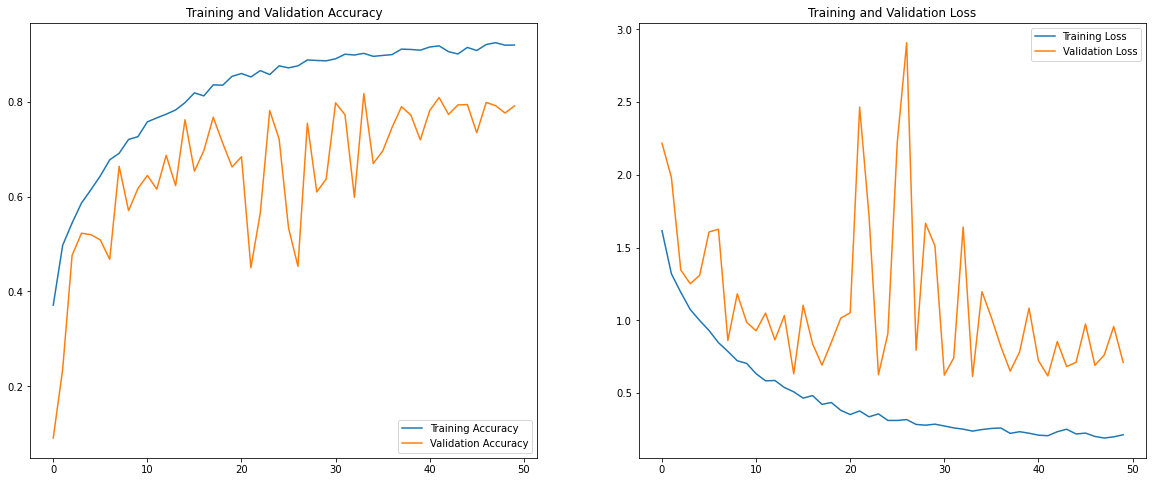

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Step 22: Findings after the Rectified Class Imbalance Treatment using Augmentor

# The model (with Augmentor) accuracy is 91.90% and the validation accuracy is 79.06%.

Yes, the class imbalance treatment using Augmentor library did help. It got rid of overfitting as well as underfitting.